In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# Sample variance

In [2]:
a = sp.random.normal(size=1000)
stats.tvar(a) # Sample variance

1.0464456405856764

In [3]:
a.var()

1.0453991949450905

In [4]:
a.var() * a.size / (a.size - 1)

1.0464456405856764

# Shapiro-Wilk

In [5]:
norm1 = sp.random.normal(size=1000)

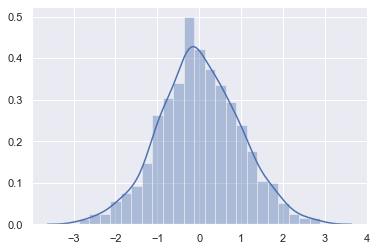

In [6]:
sns.distplot(norm1)

In [7]:
norm1[:10]

array([ 0.74372623,  1.68478422,  0.2497119 ,  0.88077263,  1.38431839,
        0.05969471,  0.9131871 , -1.18847971,  0.70599136, -0.87672698])

In [8]:
exp1 = sp.random.exponential(size=1000)

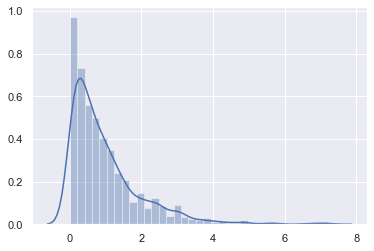

In [9]:
sns.distplot(exp1)

In [10]:
print(stats.shapiro(norm1))
print(stats.shapiro(exp1))

(0.998319149017334, 0.4425372779369354)
(0.7997354865074158, 2.190768637956505e-33)


# Student

In [11]:
y = np.random.normal(1, 1, size=90)
x = np.random.normal(1.3, 1, size=90)
print(stats.ttest_ind(y, x)) # H3 y_mean <> x_mean
y.mean(), x.mean()

Ttest_indResult(statistic=-3.44187000084148, pvalue=0.0007199892901390361)


(0.8593550293724225, 1.315954316183412)

In [12]:
# H1: y < x
# 1. T-statistic < 0
s, p = stats.ttest_ind(y, x)
s, p

(-3.44187000084148, 0.0007199892901390361)

In [13]:
one_sided_p_value = p / 2
one_sided_p_value

0.0003599946450695181

# Wilcoxon
# Mann–Whitney U test

In [14]:
x = np.array([
    10043, 9596, 10305, 8354, 9413, 19776, 9815, 11311, 11253, 10856, 11389
])

y = np.array([
    14253, 7843, 9581, 8594, 16119, 10112, 10173, 9756
])

In [15]:
y.mean(), x.mean()

(10803.875, 11101.0)

In [16]:
ranks = stats.rankdata(np.hstack([x, y]))
ranks

array([ 9.,  6., 12.,  2.,  4., 19.,  8., 15., 14., 13., 16., 17.,  1.,
        5.,  3., 18., 10., 11.,  7.])

In [17]:
y_ranks = ranks[x.size:]
y_ranks

array([17.,  1.,  5.,  3., 18., 10., 11.,  7.])

In [18]:
np.sum(y_ranks)

72.0

In [19]:
y.size

8

In [20]:
y.size * (y.size + 1) / 2

36.0

In [21]:
x.size * (x.size + 1) / 2

66.0

In [22]:
stats.mannwhitneyu(y, x, alternative='two-sided')

MannwhitneyuResult(statistic=36.0, pvalue=0.5357239360626169)

In [23]:
y_ranks

array([17.,  1.,  5.,  3., 18., 10., 11.,  7.])

In [24]:
x_ranks = ranks[:x.size]
x_ranks

array([ 9.,  6., 12.,  2.,  4., 19.,  8., 15., 14., 13., 16.])

In [25]:
u1 = x_ranks.sum() - x.size * (x.size + 1) / 2
u1

52.0

In [26]:
u2 = y_ranks.sum() - y.size * (y.size + 1) / 2
u2

36.0

# Fisher

**Greater / Lesser**

In [27]:
y = np.random.normal(0, 1, size=100)
x = np.random.normal(0.5, 1.5, size=100)

print(y.mean(), x.mean())
print(y.var(), x.var())

-0.00948505477764567 0.541584958965819
1.1602218791502192 2.1316525542325055


In [28]:
F = stats.tvar(x) / stats.tvar(y)
F

1.837280086282971

In [29]:
p_value = 1 - stats.f.cdf(F, len(x) - 1, len(y) - 1)
p_value

0.0013685620644021679

# Ansari-Bradley test

In [30]:
stats.ansari(x, y)

AnsariResult(statistic=4853.0, pvalue=0.3356823720474522)

In [31]:
N = x.size + y.size
print(N)
A = 0
for r in stats.rankdata(np.hstack([x, y]))[:x.size]:
    A += (N + 1) / 2 - np.abs(r - (N + 1) / 2)
A

200


4853.0

In [32]:
M = x.size * (N + 2) / 4
D = x.size * y.size * (N + 2) * (N - 2) / (48 * (N - 1))

A_std = (A - M) / np.sqrt(D)
A_std

-0.9627313255319555

In [33]:
p_value = 2 * stats.norm.cdf(A_std)
p_value

0.3356823720474522